## 1.0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
f_len = 11

## 1.1. Импорт данных

In [3]:
data = pd.read_excel('Data2.xlsx', sheet_name='Данные приведенные', index_col=0).iloc[:, :11]
data.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Субъект Российской Федерации,,,,,,,,,,,
Алтайский край,270.409072,27.965497,0.099022,55.7,-17.9,3.436195,1.367448,14.1,142.495777,4.233944,0.342076
Амурская область,520.025482,417.463933,0.071861,59.9,0.2,6.386836,2.491194,14.0,238.738568,5.465246,0.320224
Архангельская область (кроме Ненецкого автономного округа),508.094291,66.942691,0.050896,54.9,-28.0,4.255242,0.782521,13.2,322.424088,5.524907,0.394441
Астраханская область,593.952789,86.132520,0.042404,57.1,-77.6,2.747358,1.321414,11.3,231.165655,6.072589,0.281047
Белгородская область,617.772042,66.019714,0.160267,61.0,59.5,2.115136,0.695352,13.4,189.024556,4.051265,0.350907


## 1.2. Стандартизация данных

In [4]:
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Субъект Российской Федерации,,,,,,,,,,,
Алтайский край,-0.410349,-0.373825,0.379010,-0.500320,-0.473504,0.042511,0.111473,0.616835,-0.557721,-0.602215,0.360536
Амурская область,-0.169094,0.937437,-0.167552,0.313413,-0.142178,2.967197,2.144157,0.581095,0.152925,0.762369,-0.206392
Архангельская область (кроме Ненецкого автономного округа),-0.180626,-0.242606,-0.589449,-0.655317,-0.658388,0.854353,-0.946569,0.295173,0.770849,0.828488,1.719099
Астраханская область,-0.097643,-0.178003,-0.760337,-0.229076,-1.566331,-0.640266,0.028206,-0.383892,0.097007,1.435454,-1.222807
Белгородская область,-0.074622,-0.245714,1.611456,0.526533,0.943326,-1.266927,-1.104245,0.366653,-0.214158,-0.804669,0.589643


## 1.3. Построение дендрограмм

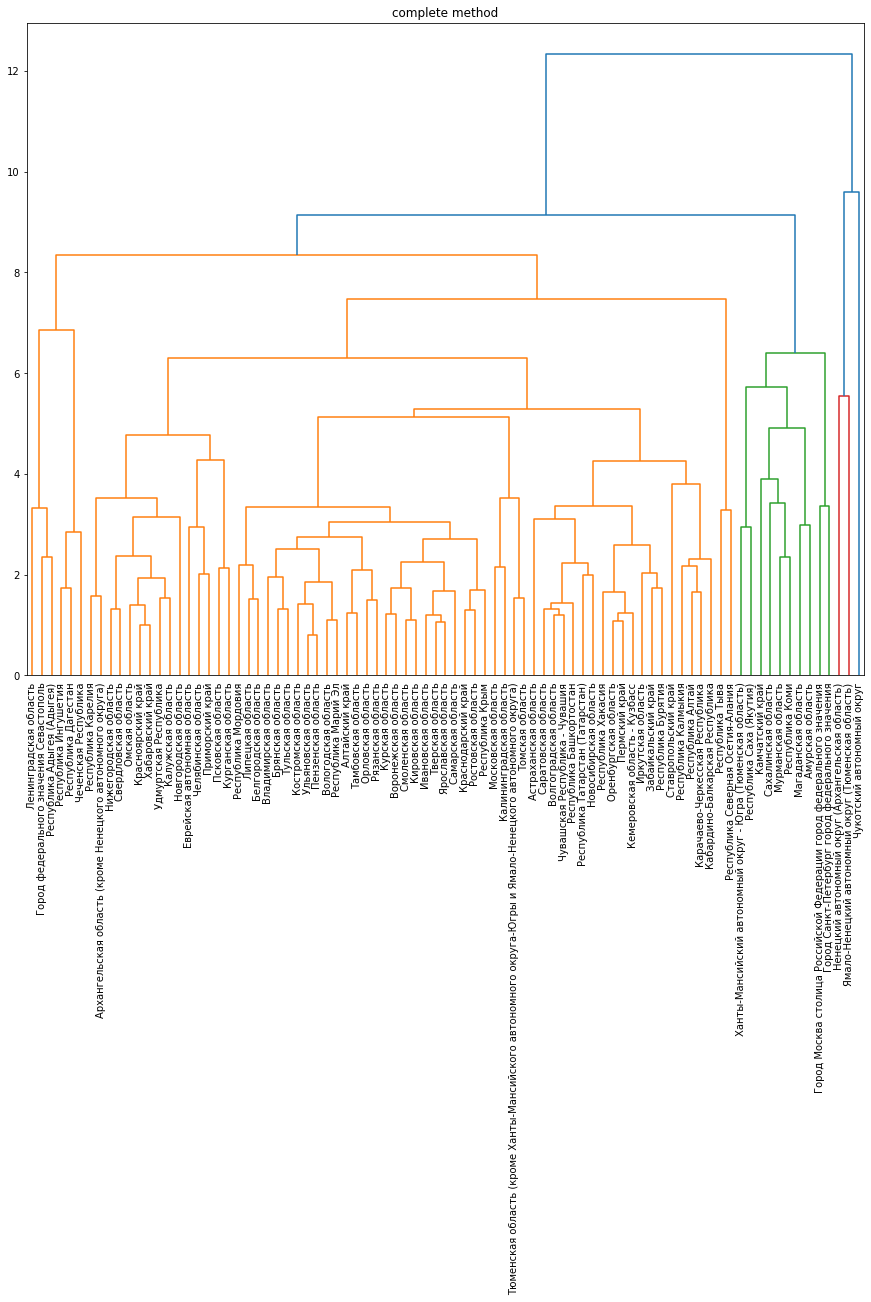

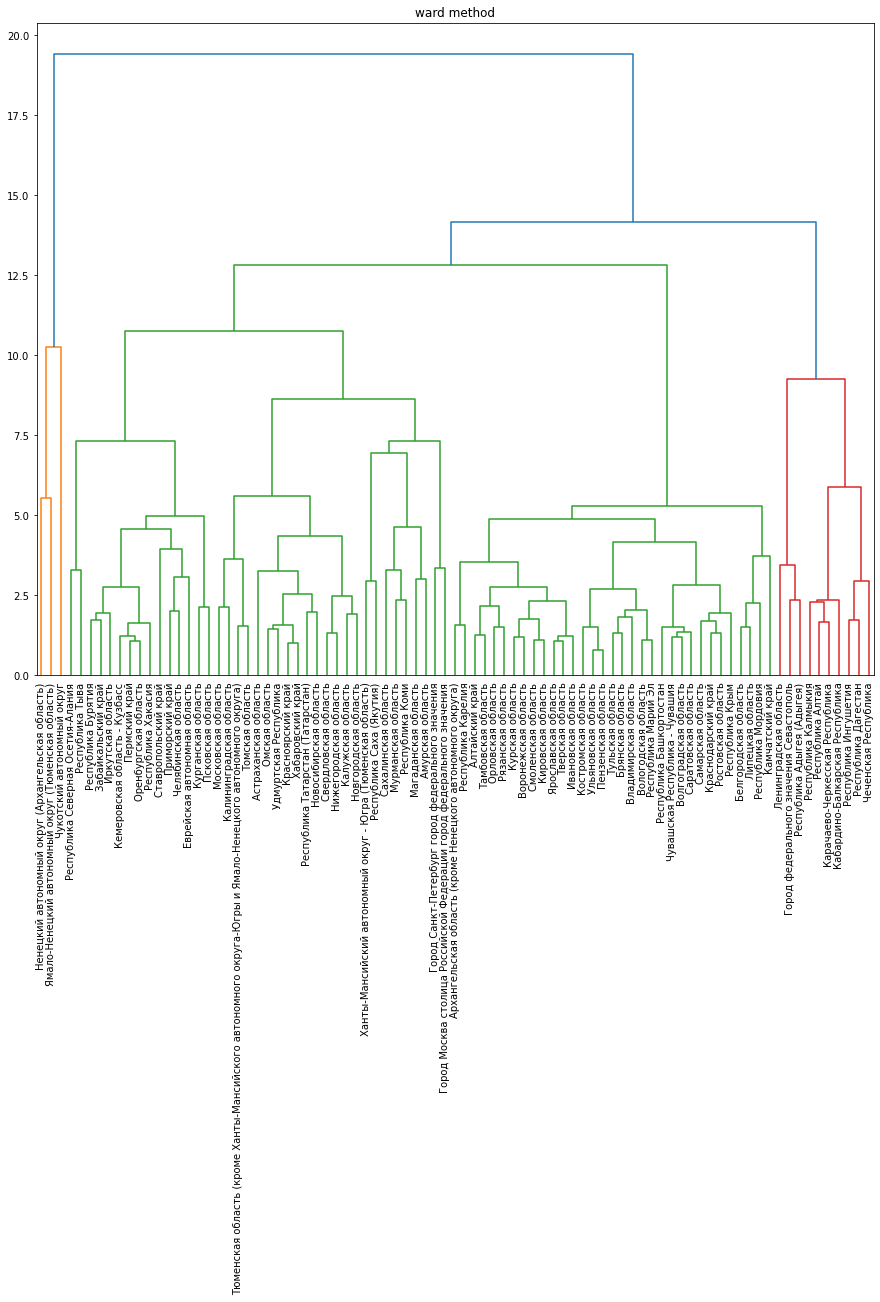

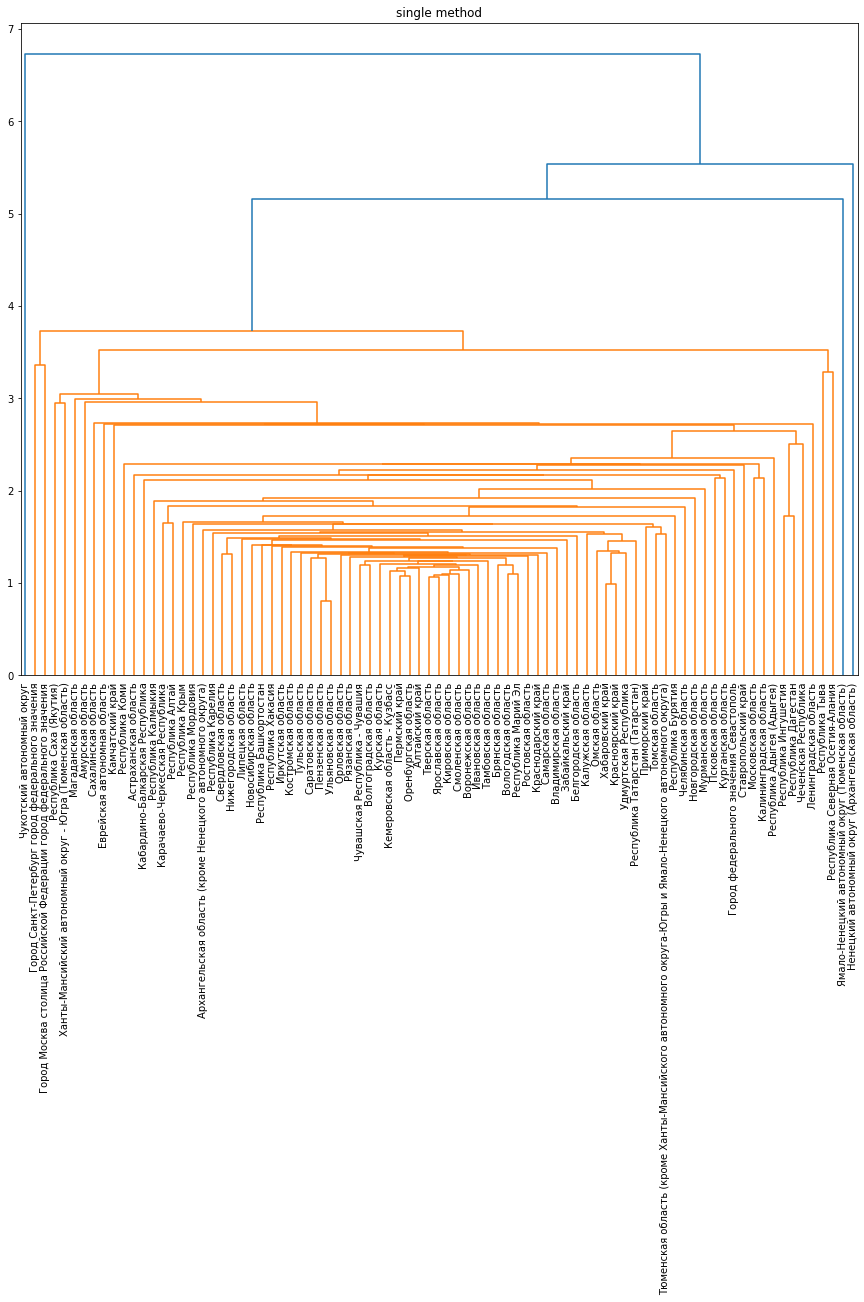

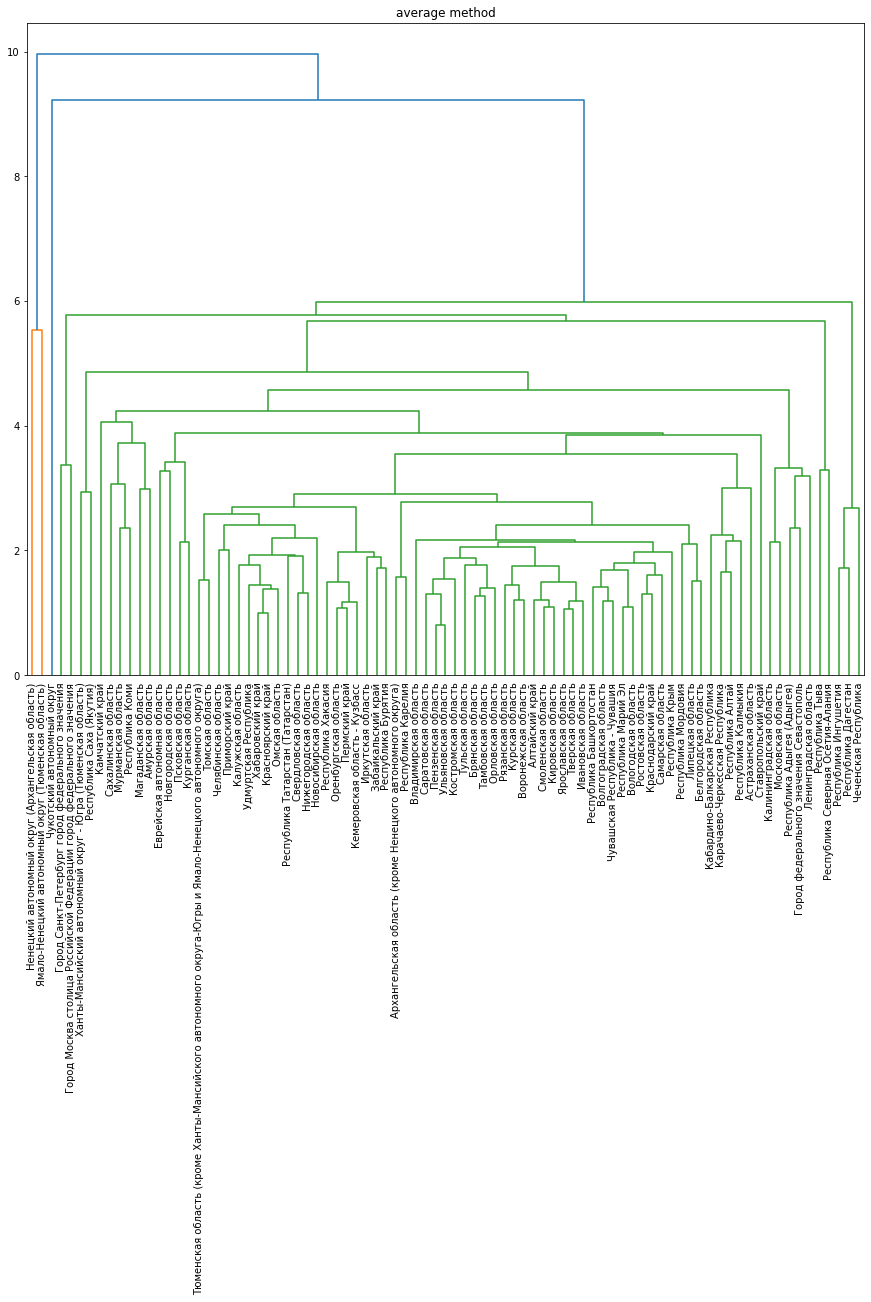

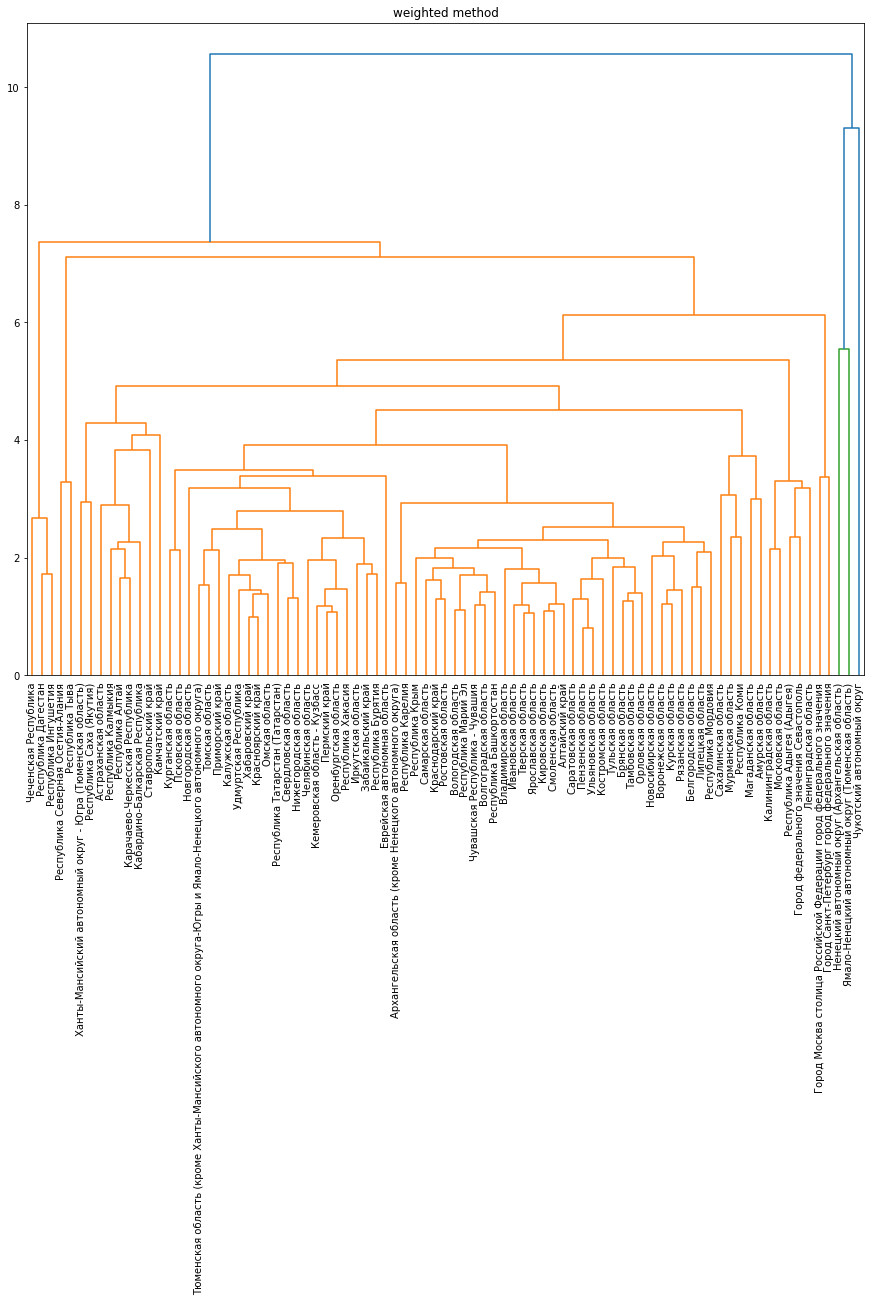

In [5]:
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    #строим дендрограмму

    plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

    plt.title('{} method'.format(method))
   

## Опционально. Удаление выбросов.

In [6]:
#Проверка с помощью k-means

In [7]:
#Избавление от выбросов (опционально)

## 1.4. Кластеризация.

In [8]:
CLUSTER_METHODS = ["complete", "ward", "kmeans", "single", "average",'weighted']
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 6,
    "kmeans"  : 6,
    "single" : 6,
    "average" : 5,
    "weighted" : 5,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled_data)
#метод варда
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled_data);
#метод kmeans
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=36)
kmeans.fit(scaled_data);
#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled_data)
#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled_data)
#метод взвешенного попарного среднего
Z=scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled_data))
weighted=scipy.cluster.hierarchy.fcluster(Z, 6, criterion='distance')
weighted

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 6, 5, 4],
      dtype=int32)

## 1.5. Работа с метками кластеров. Построение графиков средних значений.

In [9]:
#дополнение меток кластеров в исходный ДФ
scaled_data['complete'] = complete.labels_
scaled_data['ward'] = ward.labels_
scaled_data['kmeans'] = kmeans.labels_
scaled_data['single'] = single.labels_
scaled_data['average'] = average.labels_
scaled_data['weighted']= weighted

def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled_data[scaled_data[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled_data[scaled_data[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}
dfs = []
path = "means.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )


    means[method].to_excel(writer, sheet_name = '{} means'.format(method))
writer.save()

for method in CLUSTER_METHODS:
    print(means[method])


                  X1        X2        X3        X4        X5        X6  \
complete_0 -0.380429 -0.224082 -0.698328 -0.629484  1.717946 -1.360150   
complete_1  0.635679  0.483884  0.089595  1.311204 -0.549105  0.657013   
complete_2 -0.433987 -0.340716 -0.903812 -1.982477 -0.748999  1.498716   
complete_3  5.746277  5.904978  1.629687  1.931191 -0.208077  0.554598   
complete_4 -0.248026 -0.249186 -0.072625 -0.202133 -0.074792 -0.039771   
complete_5  1.174866  1.325054  6.490280  3.703966  1.884219  0.029503   

                  X7        X8        X9       X10       X11  count  
complete_0 -0.942076 -1.438230 -1.157822 -0.859937 -1.478620    6.0  
complete_1  0.643110 -0.612630  0.517559  1.361670  0.596243   10.0  
complete_2  3.220584 -1.098698 -1.293871  1.252713 -0.877254    2.0  
complete_3 -0.656485 -2.063685 -0.423148  0.736587 -0.457318    2.0  
complete_4 -0.068477  0.347108  0.094413 -0.236059  0.089599   64.0  
complete_5 -1.524314 -1.134438 -0.837056  2.672102 -0.155876 

## 1.6. Построение графиков средних.

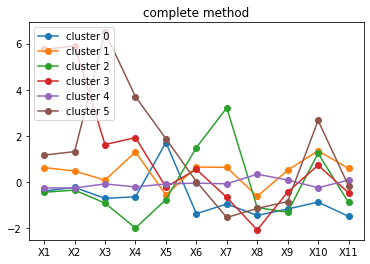

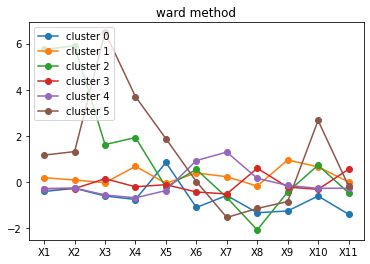

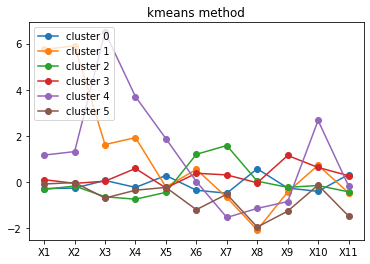

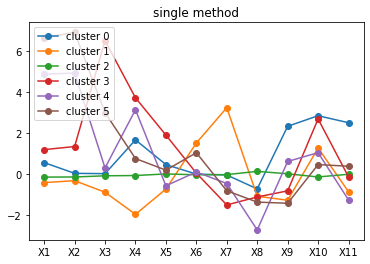

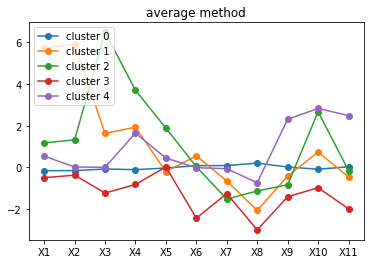

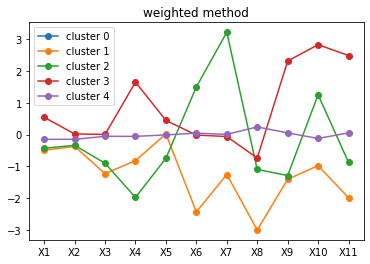

In [10]:
for method in CLUSTER_METHODS:
    # в cur_mean записывается элемент словаря means, соот-ветствующий ключу method (т.е. средние значения признаков в кластерых для метода method)
    cur_mean = means[method] 
    plt.figure(figsize=(6,4))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1].values, marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[0][:-2])) #назва-ние 


## 1.7. Выгрузка элементов в кластерах.

In [11]:
cluster_dict = {}
path = "members.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    dfs = []  
     #для каждого кластера проходимся по объектам и запи-сываем их в словарь
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled_data[scaled_data[method]==i][features]
        
        #Записываем элементы кластеров в файл members. Файл создается в той же директории, где лежит ноутбук с кодом
        cluster_dict['{}_{}'.format(method, i)].to_excel(writer, sheet_name = '{}_{}'.format(method, i))
        
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'
              .format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['Город федерального значения Севастополь' 'Ленинградская область'
 'Республика Адыгея (Адыгея)' 'Республика Дагестан' 'Республика Ингушетия'
 'Чеченская Республика']
Состав кластера 1: ['Амурская область'
 'Город Москва столица Российской Федерации город федерального значения'
 'Город Санкт-Петербург город федерального значения' 'Камчатский край'
 'Магаданская область' 'Мурманская область' 'Республика Коми'
 'Республика Саха (Якутия)' 'Сахалинская область'
 'Ханты-Мансийский автономный округ - Югра (Тюменская область)']
Состав кластера 2: ['Республика Северная Осетия-Алания' 'Республика Тыва']
Состав кластера 3: ['Ненецкий автономный округ (Архангельская область)'
 'Ямало-Ненецкий автономный округ (Тюменская область)']
Состав кластера 4: ['Алтайский край'
 'Архангельская область (кроме Ненецкого автономного округа)'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'

## 1.8. Функционал качества разбиения.

In [12]:
def Q(method_num, mean_data_row):
    q = 0 
    for i in range(len(method_num)): 
        tmp=0
        for j, feature in zip(range(len(features)), features):
            tmp = tmp + (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
            q = q + tmp
        return q

## 1.9. Таблица средних.

In [13]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
mean_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,count
complete_0,-0.380429,-0.224082,-0.698328,-0.629484,1.717946,-1.360150,-0.942076,-1.438230,-1.157822,-0.859937,-1.478620,6.0
complete_1,0.635679,0.483884,0.089595,1.311204,-0.549105,0.657013,0.643110,-0.612630,0.517559,1.361670,0.596243,10.0
complete_2,-0.433987,-0.340716,-0.903812,-1.982477,-0.748999,1.498716,3.220584,-1.098698,-1.293871,1.252713,-0.877254,2.0
complete_3,5.746277,5.904978,1.629687,1.931191,-0.208077,0.554598,-0.656485,-2.063685,-0.423148,0.736587,-0.457318,2.0
complete_4,-0.248026,-0.249186,-0.072625,-0.202133,-0.074792,-0.039771,-0.068477,0.347108,0.094413,-0.236059,0.089599,64.0
complete_5,1.174866,1.325054,6.490280,3.703966,1.884219,0.029503,-1.524314,-1.134438,-0.837056,2.672102,-0.155876,1.0
ward_0,-0.401174,-0.263235,-0.594457,-0.748315,0.853996,-1.093389,-0.572420,-1.320287,-1.243539,-0.596981,-1.386000,10.0
ward_1,0.196496,0.096664,-0.022373,0.688795,-0.046686,0.402440,0.237288,-0.166473,0.964911,0.665272,0.013317,24.0
ward_2,5.746277,5.904978,1.629687,1.931191,-0.208077,0.554598,-0.656485,-2.063685,-0.423148,0.736587,-0.457318,2.0
ward_3,-0.276979,-0.274993,0.151741,-0.196785,-0.105512,-0.423121,-0.506117,0.603838,-0.211459,-0.308164,0.559738,33.0


In [14]:
Dw=pd.DataFrame(columns=features)
quality=pd.DataFrame(columns=['Q1','method'])
for j in CLUSTER_METHODS:
    for i in scaled_data[j].unique():
        Dw=Dw.append(((scaled_data[scaled_data[j]==i][features]-
            pd.pivot_table(scaled_data,columns=j)[4:].loc[:,i])**2).sum(),ignore_index=True)
    print(f'Q1={np.sum(Dw.to_numpy())}, method: {j}',)
    quality=quality.append({'Q1':np.sum(Dw.to_numpy()),'method':j},ignore_index=True)
    Dw=pd.DataFrame(columns=features)
quality.T

Q1=352.412565421061, method: complete
Q1=313.7223293879317, method: ward
Q1=291.3817382197899, method: kmeans
Q1=428.71719874283315, method: single
Q1=415.3970465232548, method: average
Q1=374.43576853678314, method: weighted


,0,1,2,3,4,5
Q1,352.412565,313.722329,291.381738,428.717199,415.397047,374.435769
method,complete,ward,kmeans,single,average,weighted
